In [1]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import json
import re
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import pylab as pl
from networkx.algorithms.community import k_clique_communities

In [2]:
x = pd.read_csv('/home/rubisco/Desktop/insight/dash/final/csv/ethereum.csv')
y = x.dropna()

In [3]:
sentences = y.loc[:, 'text']
text = y.loc[:, 'text']
users = y.loc[: , "username"]

In [4]:
sentiment_list = []
analyzer = SentimentIntensityAnalyzer()
for sentence in sentences:
    sentiment = analyzer.polarity_scores(sentence)
    sentiment_list.append(sentiment)

In [20]:
i = 0
for element in sentiment_list:
    if element['compound'] < -0.8 > -0.9:
        print(sentences[i])
        #print(i, element['compound'])
    i += 1

RT @theCLRTYproject: It takes 10 mins to add a block onto a #blockchain with #BTC and just 15 seconds on #ethereum 😱 🔗 ❗️ 

#theCLRTYprojec…
👍 on @YouTube: Sorry David, You Failed, Again Arbitraging Exit Scam #cryptonews #bitcoin #ethereum https://t.co/stnAmz3NH1
It takes 10 mins to add a block onto a #blockchain with #BTC and just 15 seconds on #ethereum 😱 🔗 ❗️… https://t.co/0eDc4GocGv
Our raid on the sand for the death of her sorrow. #twitterbot #crypto #cryptocurrency #bitcoin #ethereum
@Cryptopia_NZ @nzpolice @ethereum 
Ethereum and its ERC coins is running a fraud.
This is bad and why cryptocurrenc… https://t.co/q0olIKfVlQ
15 Suspects Arrested in Alleged $8 Million Taiwan Cryptocurrency Scam https://t.co/RxQ0QvEi6V #cryptonews… https://t.co/kOSIl0P3sv
Death threats, police, FBI, and accusations of manipulation follow... #blockchain #ethereum #eth binance… https://t.co/XlLVX4aI7B
Fear, loathing, and donuts: Reddit's failed crypto utopia - Decrypt Media https://t.co/v7vnFhbDnK
RT @b

In [6]:
senders = []
for user in users:
    if user not in senders:
        senders.append(user)

In [7]:
def getWords(text):
    return re.compile('.\w+').findall(text)

In [8]:
receiver = []
i = 0
for element in text:
    if element != None:
        words = getWords(element)
    for word in words:
        if word[0] == '@':
            if word[1:] not in receiver:
                receiver.append(word[1:])

In [9]:
total = []
for element in receiver:
    total.append(element)
for element in senders:
    if element not in total:
        total.append(element)

In [10]:
interaction = []
for index, row in x.iterrows():
    string = str(row['text'])
    user = str(row['username'])
    words = getWords(string)
    if len(words) > 0:
        if words[0] != 'RT':
            for element in words:
                if element[0] == '@':
                    if (user, element[1:]) not in interaction:
                        interaction.append((user, element[1:]))

In [11]:
G=nx.Graph()
G.add_nodes_from(total)
G.add_edges_from(interaction)

In [12]:
betweenness = nx.closeness_centrality(G)

In [19]:
influencer = []
for element in betweenness:
    if betweenness[element] > 0.03:
        influencer.append(element)

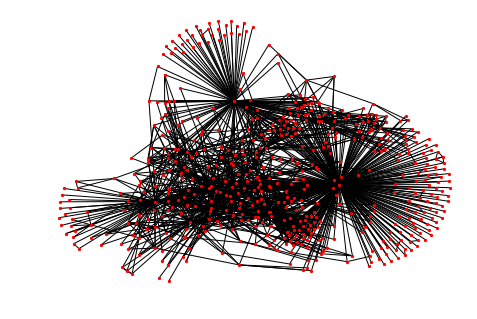

In [20]:
k = G.subgraph(influencer) 
nx.draw(k, with_labels=False, node_size=5);

In [21]:
interaction = []
sentiment_dic = {}
times = {}
for index, row in y.iterrows():
    string = str(row['text'])
    user = str(row['username'])
    words = getWords(string)
    sentiment = analyzer.polarity_scores(string)
    if user in sentiment_dic:
        sentiment_dic[user] += sentiment['compound']
    elif user not in sentiment_dic:
        sentiment_dic[user] = sentiment['compound']
    if user in times:
        times[user] += 1
    elif user not in times:
        times[user] = 1

In [22]:
normalize = {}
for element in sentiment_dic:
    amount = times[element]
    normalize[element] = sentiment_dic[element] / times[element]
normalize

{'LaDiva28109732': 0.1534909090909091,
 'erricadewi': 0.23512500000000003,
 'betbox_OX': 0.13903333333333331,
 'David22056803': 0.18158,
 'SoulKing_KRYPTO': 0.2079093750000001,
 'Carlos27956422': -0.081175,
 'SteliosTXDM': 0.26328333333333337,
 'Elizabe85061178': 0.11305000000000001,
 'leboncoincrypto': -0.0010375000000000013,
 'cryptomehh': 0.06762494154325785,
 'Crypto_hummer': 0.6864727272727273,
 'Abiola_Usman': -0.007611111111111102,
 'AlcidesPadron': 0.08967272727272725,
 'gastroadvisor': 0.0,
 '22Ticks': 0.0258,
 'MaolisSara': 0.1365764705882353,
 'groovyhooman': 0.0025630749014454663,
 '0xbull': 0.0,
 'collet_ricsamar': 0.144075,
 'nuonrg': -0.06851333333333334,
 'muharm_erby': 0.0,
 'aflam_sex8': 0.0,
 'SX5_Ww3rbSexCom': 0.0,
 'SX5_MovieXxCom': 0.0,
 'mujb_mika': 0.0,
 'aweber1': 0.0,
 'elias102040': 0.17860000000000004,
 'Oscar02052561': 0.15482142857142858,
 'MyCryptoRocket': 0.4697,
 'arlemni2': 0.19455,
 'kelemenff': 0.3247888888888889,
 'ViralKiller1': 0.3167,
 'badcrypto

In [23]:
nx.write_edgelist(k, path="grid.edgelist", delimiter=":")

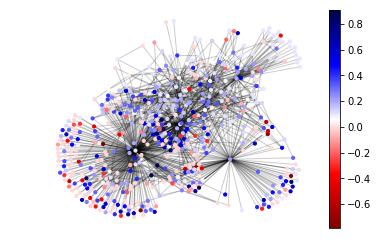

In [24]:
values = [normalize.get(node, 0.1) for node in k.nodes()]

pos = nx.spring_layout(k)
ec = nx.draw_networkx_edges(k, pos, alpha=0.2)
nc = nx.draw_networkx_nodes(k, pos, node_color=values, 
                            with_labels=False, node_size=10, cmap=plt.get_cmap('seismic_r'))
plt.colorbar(nc)
plt.axis('off')
plt.show()

In [25]:
def save_obj(name):
    with open('obj/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [26]:
import pickle
pickle.dump(normalize, open( "save.pkl", "wb" ) )

In [27]:
influencer = []
for element in betweenness:
    if betweenness[element] > 0.002:
        print(element, betweenness[element])

Chloe__Diamond 0.032914114490473566
kevinabosch 0.032914114490473566
aiww 0.02658173668910797
ethereum 0.043199413416124634
mishalederman 0.03016133439001149
Forbes 0.030059812150632626
RichardHeartWin 0.02883003642315766
APompliano 0.031818185563343725
badcryptobitch 0.03087806189359006
DeanEigenmann 0.031518052524469785
Coin3t 0.03012618563182882
holochainnews 0.02273232427182566
oluseunoyewoleo 0.033270834555397755
Cryptopia_NZ 0.028831728723957332
nzpolice 0.02681098965836993
SquareDev 0.02739874661356262
xRpTo_O 0.02739874661356262
Rento_app 0.021541920553543138
Hackatao 0.023200478510289408
SuperRare_co 0.027887204368440194
CryptoAmb 0.02139646848498593
evabeylin 0.02566234746819943
nwoodfine 0.02352832585463389
DecentralizeTRX 0.0230264558877379
ThomTwen 0.02783662967080403
vladzamfir 0.02316546387498642
TronColony 0.02210220629713977
pet3rpan_ 0.029542724079233553
ETHBerlin 0.034348065072820774
MithrilOre 0.024560094531793444
CrookedIntriago 0.020850589232132153
CoinAlcedo 0.02

marshalletaylor 0.02935030358777037
vydinhtran100 0.018593932864223846
Nick84883905 0.02935030358777037
dragos_dydy 0.02044357489974765
BCGbiz 0.028576758816694036
PlayUpGlobal 0.023675760654648464
Tha_Crypto_Guy 0.018938052534752357
mikefeg95 0.020135169736055468
inside_r3 0.027380418671126432
Coil 0.020135169736055468
omni 0.020135169736055468
mysticryuujin 0.028765875873577575
SalmirHrnjic 0.01939878872596118
investCH 0.03291632023464262
HofSwitzerland 0.026578859877777982
nikudm 0.023253199381779912
theog__ 0.01702521076399782
epicenterbtc 0.02633517401433366
nithyanflash 0.03386028750457308
NetworkYammy 0.021474110546991523
DallasWhitley 0.02662063468328747
krbecrypto 0.01773459454583106
HarvardChanSPH 0.028126744003970514
RippleXrpie 0.028673516085308645
boncryp 0.028673516085308645
6102bitcoin 0.025462795777155888
ShasperS 0.027504610289021004
unchainio 0.01965495520373498
awscloud 0.022917941887893666
3boxdb 0.02907406952417054
BloxliveTV 0.01942026453192065
stunad620 0.0220932

BattistelloDana 0.019470302871579543
BitMEXResearch 0.020239711988682095
SemiBeing 0.024908835668205138
The_Rippening 0.027561715422329675
dirilispostasi 0.022763930599311172
007Macmac007 0.019902643159825643
xenzor1 0.024722031937856707
thecloudbook 0.019547790446186854
travalacom 0.027192455878942427
conroydave 0.023205959110901307
ShrimpCapital 0.03299149184184156
KmaDeno 0.02337715151784004
lex_node 0.02803843649625169
TogaTheEvilOne 0.018593932864223846
ethchris 0.021639674444503352
AntonPagi 0.03014652492121384
cryptoanteater 0.02573090945263435
mycryptoheroes 0.026874067436742193
Zed_run 0.026874067436742193
el33th4xor 0.030635397651178013
HammerToe 0.028505445449558187
GThorston 0.022525903716640087
Marian_XRP_hodl 0.022525903716640087
DeCryptonauten 0.02743700874434907
GetLuckyCrypto1 0.019973865663915135
samantha_chang 0.020042327928401563
komodoman 0.03299149184184156
AayushJs 0.023330514916702468
stillsafe 0.023046984353478656
highsidecrypto 0.026609097488560437
AdeldMeyer 

Maharab_forhad 0.019930909371097916
Nikhil25257582 0.02658173668910797
weed_miner 0.023081641472807193
Colemans1 0.023526071967685462
BassBauman 0.02881481465102294
acetrungthanh 0.020158307910257616
rasedul37018442 0.02070818038455825
palbino8 0.027868217335678697
ethtective 0.027819286958616737
Alfiocriptos_26 0.02476316261867089
sfalah 0.03295828561640858
mehmets02415715 0.0338579534391216
Miimiis_Pets 0.026337998313117974
cryptodaredevil 0.03427137388650133
walda87 0.019697518869960583
CuongTruong777 0.025532948512831374
Btcdonar1 0.020113731799399553
CryptoAnne07 0.021810716276258305
therevoltingx 0.029784569191761392
Scot_Striker 0.02341057769130819
SakonnetCapital 0.025224801280882142
JilkeyC 0.024572381336802097
Crypto_Progress 0.024907572542664153
jeakni2 0.015647573448274516
BRTcrpt 0.01939878872596118
GuardianGold1 0.017599875682289563
VVitnet 0.022455873933220735
Boro61226854 0.028613382881354836
as1ndu 0.02788403806649657
CryptoRabbit13 0.023328298767102212
Shadowz_Jr 0.02

meeseeking 0.033228069986560485
IAmNickDodson 0.02515504099873692
alexfiligr 0.017820169449673007
ThruReading 0.03333405704386407
NathanH39320613 0.02338271591646849
vCloudernBeer 0.027729765174805913
leannespicer1 0.02180200321990932
JackGfy 0.02454904690830353
Picakuuu 0.02652431853015105
slimiles 0.033171968024673266
DromaEditing 0.023253199381779912
danwerth 0.03297598728038517
Blockchainwins 0.02194911656722393
jayhasgin 0.023573494458693466
bycoindoo 0.03369074220051698
vaibhavchellani 0.03311159030209904
flex2264 0.025527640483412353
MyAwesomeTravel 0.01800701435426686
CenkBabaeren 0.027277021743840568
GlPrns 0.01781629114372437
nebbby 0.03464118277320947
pshenichnyy 0.033013666523816175
grahammcbain 0.033998569290602694
rafaelv11616194 0.02044357489974765
KINGSATOSHII 0.02338271591646849
steikunasp 0.032909703888866805
JohnnyMkool 0.026302738060476442
futureoutfit 0.02827896427781318
SatoshisVision 0.025202798016385503
UpstateAgency 0.02842132453080298
EternalSupreme 0.01852520

In [32]:
influencer = []
for element in betweenness:
    if betweenness[element] > 0.036:
        print(element, betweenness[element])

ethereum 0.043199413416124634
preston_vanloon 0.03654593233194472
spencernoon 0.03641047668949867
VitalikButerin 0.03851163011928314
Utoday_en 0.03619049001925561
MihailoBjelic 0.036251924905257735
lrettig 0.0360259153983671
EthereumNetw 0.036094747982167635
IslandHunting 0.03757189096162603
antiprosynth 0.038605464948623526
factcheckmypost 0.037586266493827444
